In [1]:
import seaborn as sns

In [2]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.shape

(891, 15)

In [4]:
'name' in df_titanic.columns.tolist()

False

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

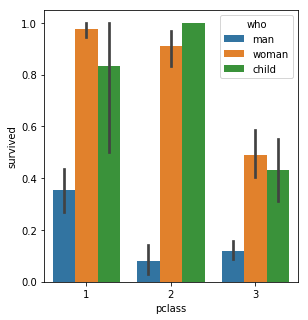

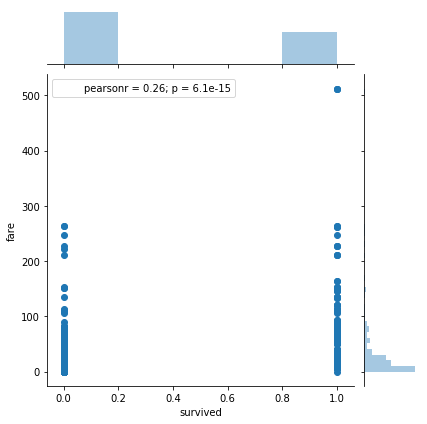

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.barplot(x='pclass', y='survived', hue='who', data=df_titanic)
sns.jointplot(x='survived', y='fare', data=df_titanic)

In [7]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())
print(df_titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
sex_mapping = {'male':0, 'female':1}
df_titanic['sex'] = df_titanic['sex'].map(lambda x: sex_mapping[x])

In [10]:
print(df_titanic['embark_town'].unique())
df_titanic['embark_town'] = df_titanic['embark_town'].fillna('Southampton')
df_titanic.loc[df_titanic['embark_town'] == 'Southampton', 'embark_town'] = 0
df_titanic.loc[df_titanic['embark_town'] == 'Cherbourg', 'embark_town'] = 1
df_titanic.loc[df_titanic['embark_town'] == 'Queenstown', 'embark_town'] = 2

['Southampton' 'Cherbourg' 'Queenstown' nan]


([<matplotlib.patches.Wedge at 0x2243ff1fe48>,
 [Text(1.07729,0.222389,'female_survived_count'),
  Text(0.628353,0.963157,'female_not_survived_count'),
  Text(-1.01863,0.415198,'male_survived_count'),
  Text(0.422867,-1.01547,'male_not_survived_count')])

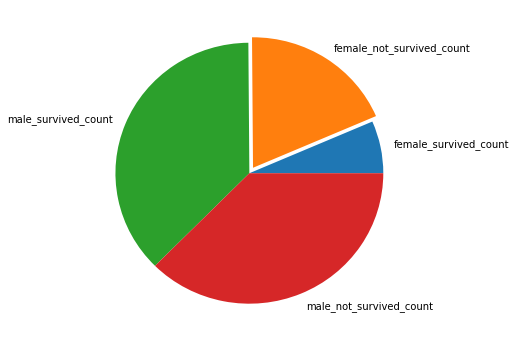

In [11]:
df_female = df_titanic[df_titanic['sex'] == 1]
df_male = df_titanic[df_titanic['sex'] == 0]
female_count = len(df_female)
male_count = len(df_male)
female_survived_count =  len(df_female[df_female['survived'] == 0])
female_not_survived_count =  len(df_female[df_female['survived'] == 1])
male_survived_count =  len(df_male[df_male['survived'] == 0])
male_not_survived_count =  len(df_male[df_male['survived'] == 0])

labels=['female_survived_count','female_not_survived_count','male_survived_count', 'male_not_survived_count']
plt.figure(figsize=(6, 6))
plt.pie([female_survived_count, female_not_survived_count, male_survived_count, male_not_survived_count], explode=(0, 0.05, 0, 0), labels=labels)

In [12]:
df_titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,0,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,1,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,0,yes,True


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

predictors = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'age', 'embark_town']

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset. It return the row indices corresponding to train
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(df_titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm. Note how we only take the rows in the train folds.
    train_predictors = df_titanic[predictors].iloc[train, :]
    # The target we're using to train the algorithm.
    train_target = df_titanic['survived'].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(df_titanic[predictors].iloc[test, :])
    predictions.append(test_predictions)

d:\python\python3.6.3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
for i in range(len(predictions)):
    print(predictions[i] > 0.5)

[False  True  True  True False False False False  True  True  True  True
 False False  True  True False False  True  True False False  True  True
  True False False False  True False False  True  True False  True False
 False False  True  True False  True False  True  True False False  True
 False  True False False  True  True False  True  True False  True False
 False  True False False  True False  True False False False False False
 False False False False False False False  True False False  True  True
  True False False False  True False False False False False False False
 False  True  True False  True False  True False False False  True False
 False  True False  True False  True  True False False False  True  True
 False False False  True False False False False  True False False False
 False  True False False  True False False  True  True  True  True False
 False False False  True False False False  True False False False False
  True False False False False  True False False Fa

In [15]:
import numpy as np

predictions = np.concatenate(predictions, axis=0)
print(predictions.shape)

(891,)


In [17]:
# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions = alg.predict(df_titanic[predictors])

predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = sum(predictions[predictions == df_titanic['survived']]) / len(predictions)
print('accuracy = ', accuracy)

accuracy =  0.262626262626


In [19]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds. (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, df_titanic[predictors], df_titanic['survived'], cv=3)
# Take the mean of the scores (because we have one of each fold)
print(scores.mean())

0.79012345679


In [29]:
df_titanic = sns.load_dataset('titanic')
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())
df_titanic['fare'] = df_titanic['fare'].fillna(df_titanic['fare'].median())
df_titanic.loc[df_titanic['sex'] == 'male', 'sex'] = 0
df_titanic.loc[df_titanic['sex'] == 'female', 'sex'] = 1
df_titanic['embarked'] = df_titanic['embarked'].fillna('S')

df_titanic.loc[df_titanic['embarked'] == 'S', 'embarked'] = 0
df_titanic.loc[df_titanic['embarked'] == 'C', 'embarked'] = 1
df_titanic.loc[df_titanic['embarked'] == 'Q', 'embarked'] = 2

In [31]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
kf = cross_validation.KFold(df_titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, df_titanic[predictors], df_titanic['survived'], cv=kf)

print(scores.mean())

0.785634118967


In [41]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

kf = cross_validation.KFold(df_titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, df_titanic[predictors], df_titanic['survived'], cv=kf)

print(scores.mean())

0.81593714927


In [42]:
# Generate a familysize column
df_titanic['familysize'] = df_titanic['parch'] + df_titanic['sibsp']

In [43]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title. Titles always consist of capital and lowercase letters
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

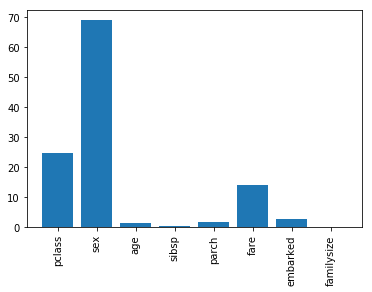

In [47]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

predictors = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'familysize']

selector = SelectKBest(f_classif, k=5)
selector.fit(df_titanic[predictors], df_titanic['survived'])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

alt = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

predictors = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'familysize']

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), predictors]
]

kf = KFold(df_titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = df_titanic['survived'].iloc[train]
    full_test_predictions = []
    
    for alg, predictors in algorithms:
        alg.fit(df_titanic[predictors].iloc[train, :], train_target)
        test_predictions = alg.predict_proba(df_titanic[predictors].iloc[test, :].astype(float))[:, 1]
        full_test_predictions.append(test_predictions)
    
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == df_titanic['survived']]) / len(predictions)
print('accuracy =', accuracy)

accuracy = 0.264870931538
